In [116]:
#Installing and importing packages
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
#Reading Data from CSV file
accidents = pd.read_csv("../data/acc2005_2016.csv")
accidents.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing.Human_Control,Pedestrian_Crossing.Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [118]:
#Figuring out the datatypes of variables
accidents.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_.District.                       int64
Local_Authority_.Highway.                       object
X1st_Road_Class                                  int64
X1st_Road_Number                                 int64
Road_Type                                        int64
Speed_limit                                    float64
Junction_D

In [119]:
#Dropping Variable of No use.
accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR','LSOA_of_Accident_Location',
                'Junction_Control', 'Local_Authority_.District.', 'Local_Authority_.Highway.', 
                'X1st_Road_Class', 'X1st_Road_Number', 'X2nd_Road_Class', 'X2nd_Road_Number',
                 'Pedestrian_Crossing.Human_Control', 'Pedestrian_Crossing.Physical_Facilities'
               ], axis=1, inplace=True)

In [120]:
#Converting to DateTime format. 
accidents["Date"] = pd.to_datetime(accidents["Date"])

In [121]:
#Figuring out total number of null values 
accidents.isnull().sum()
accidents = accidents[accidents['Time'].notna()]
accidents = accidents[accidents['Date'].notna()]

#making a new column called Hours to use it later for visualization
accidents["Hours"] = accidents["Time"].apply(lambda x: int(str(x).split(":")[0]))
accidents["Year"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[0]))
accidents["Month"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[1]))
accidents["Day"] = accidents["Date"].apply(lambda x: int(str(x).split("-")[2].split(" ")[0]))

In [122]:
accidents.head(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42,...,2,2,0,0,1,1,17,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36,...,1,1,0,0,1,1,17,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15,...,1,1,0,0,1,1,0,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35,...,1,1,0,0,1,1,10,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13,...,1,2,0,0,1,1,21,2005,10,1


In [123]:
#Dropping Minutes That is of No use
accidents.drop(["Time"], axis=1, inplace=True)

In [124]:
accidents.dtypes

Accident_Index                                         object
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Road_Type                                               int64
Speed_limit                                           float64
Junction_Detail                                         int64
Light_Conditions                                        int64
Weather_Conditions                                      int64
Road_Surface_Conditions                                 int64
Special_Conditions_at_Site                              int64
Carriage

In [125]:
#Reverse encoding the values of the Light Conditions
new_data = {1: "Daylight", 4: "Darkness: street lights present and lit", 
            5: "Darkness: street lights present but unlit", 
            6: "Darkness: no street lighting",
            7: "Darkness: street lighting unknown"}
accidents["Light_Conditions"] = accidents["Light_Conditions"].map(new_data)


In [126]:
#Reverse encoding the values of the Weather Conditions
new_data = {1: "Fine without high winds", 2:"Raining without high winds",
           3:"Snowing without high winds", 4:"Fine with high winds",
           5:"Raining with high winds", 6:"Snowing with high winds",
           7:"Fog or mist — if hazard", 8:"Other", 9:"Unknown"}
accidents["Weather_Conditions"] = accidents["Weather_Conditions"].map(new_data)


In [127]:
#Reverse encoding the values of the Road Surface Conditions
new_data = {1: "Dry", 2: "Wet/Damp", 3:"Snow", 4:"Frost/Ice", 5:"Flood"}
accidents["Road_Surface_Conditions"] = accidents["Road_Surface_Conditions"].map(new_data)


In [128]:
#Reverse encoding the values of the Carriageway Hazards
new_data = {0: "None", 1: "Dislodged vehicle", 2:"Other obects", 3:"Previous accident", 
            6:"Pedestrian", 7:"Animal"}
accidents["Carriageway_Hazards"] = accidents["Carriageway_Hazards"].map(new_data)

In [129]:
#Reverse encoding the values of the Did_Police_Officer_Attend_Scene_of_Accident
new_data = {1: "Yes", 2: "No"}
accidents["Did_Police_Officer_Attend_Scene_of_Accident"] = accidents["Did_Police_Officer_Attend_Scene_of_Accident"].map(new_data)

In [130]:
#Reverse encoding the values of the Special_Conditions_at_Site
new_data = {0: "None",
            1: "Auto traffic signal out",
            2: "Auto traffic signal partially defective",
            3: "Permanent road signing or marking defective or obscured",
            4: "Roadworks",
            5: "Road surface defective",
            6: "Oil or diesel",
            7: "Mud"}
accidents["Special_Conditions_at_Site"] = accidents["Special_Conditions_at_Site"].map(new_data)


In [131]:
#Reverse encoding the values of the Road_Type
new_data = {1: "Roundabout",
            2: "One way street",
            3: "Dual carriageway",
            6: "Single carriageway",
            7: "Slip road",
            9: "Unknown"}
accidents["Road_Type"] = accidents["Road_Type"].map(new_data)

In [132]:
#Reverse encoding the values of the Junction_Detail
new_data = {0: "Not at or within 20 metres of junction", 
            1: "Roundabout",
            2: "Mini roundabout",
            3: "T or staggered junction",
            4: "Slip road",
            5: "Crossroads",
            6: "Junction more than four arms (not RAB)",
            7: "Using private drive or entrance",
            8: "Other junction"}
accidents["Junction_Detail"] = accidents["Junction_Detail"].map(new_data)

In [133]:
new_data = {1: "Sunday", 
            2: "Monday",
            3: "Tuesday",
            4: "Wednesday",
            5: "Thursday",
            6: "Friday",
            7: "Saturday"}
accidents["Day_of_Week"] = accidents["Day_of_Week"].map(new_data)

In [134]:
accidents.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,Tuesday,Single carriageway,...,Raining without high winds,Wet/Damp,None,None,1,Yes,17,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,Wednesday,Dual carriageway,...,Fine without high winds,Dry,None,None,1,Yes,17,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,Thursday,Single carriageway,...,Fine without high winds,Dry,None,None,1,Yes,0,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,Friday,Single carriageway,...,Fine without high winds,Dry,None,None,1,Yes,10,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,Monday,Single carriageway,...,Fine without high winds,Wet/Damp,None,None,1,Yes,21,2005,10,1


In [135]:
accidents.tail(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hours,Year,Month,Day
1917269,2016984130916,-3.263990,55.058923,98,3,2,1,2016-10-28,Friday,Single carriageway,...,Fine without high winds,Wet/Damp,None,None,2,Yes,6,2016,10,28
1917270,2016984131116,-3.311238,55.004954,98,3,2,2,2016-01-11,Tuesday,Single carriageway,...,Fine without high winds,Dry,None,None,2,Yes,16,2016,1,11
1917271,2016984131216,-3.206843,55.048727,98,3,1,1,2016-10-27,Thursday,Dual carriageway,...,Fine without high winds,Wet/Damp,None,None,2,Yes,7,2016,10,27
1917272,2016984131316,-3.271187,54.989516,98,3,1,3,2016-10-29,Saturday,Single carriageway,...,Fine without high winds,Dry,None,None,2,Yes,20,2016,10,29
1917273,2016984133416,-3.447002,55.310103,98,3,1,2,2016-12-25,Sunday,Dual carriageway,...,Raining with high winds,Wet/Damp,None,None,2,Yes,12,2016,12,25


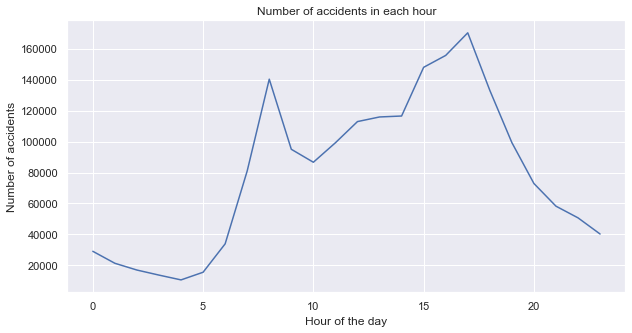

In [136]:
sns.lineplot(
    data=accidents.groupby(['Hours']).size().reset_index(name='count'), 
    x='Hours', y='count')
plt.xlabel("Hour of the day")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each hour")
plt.show()

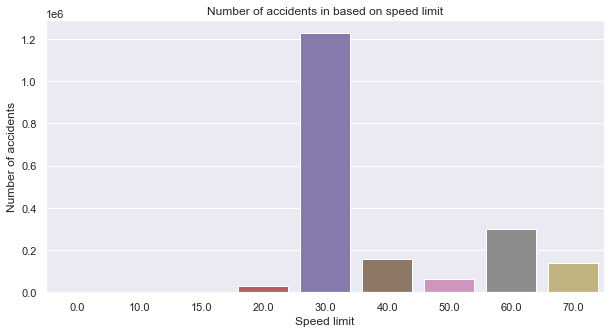

In [137]:
sns.countplot(data=accidents, x="Speed_limit")
plt.xlabel("Speed limit")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in based on speed limit")
plt.show()

<ipython-input-142-da2dc892bdbc>:25: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(4)


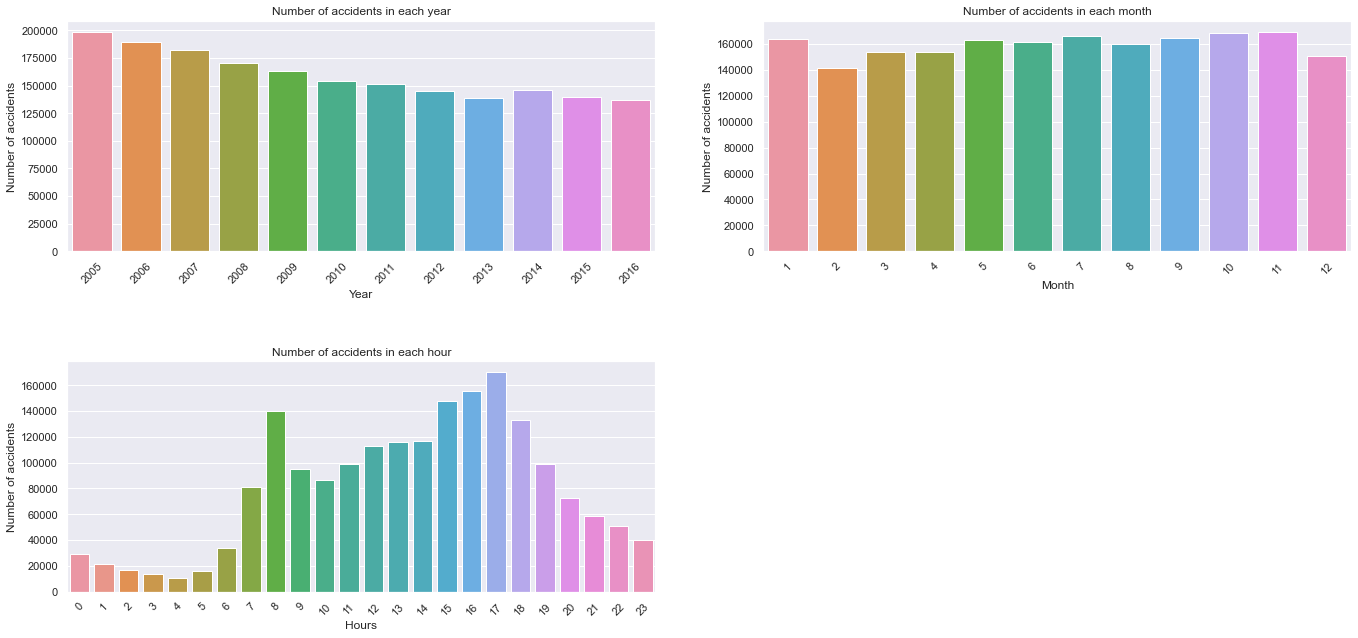

In [142]:
sns.set(rc={'figure.figsize':(20,10)})

plt.subplot(2, 2, 1)
sns.countplot(data=accidents, x="Year")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each year")

# using subplot function and creating plot two
plt.subplot(2, 2, 2)
sns.countplot(data=accidents, x="Month")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each month")

plt.subplot(2, 2, 3)
sns.countplot(data=accidents, x="Hours")
plt.xticks(rotation=45)
plt.xlabel("Hours")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each hour")

plt.tight_layout(4)
plt.show()

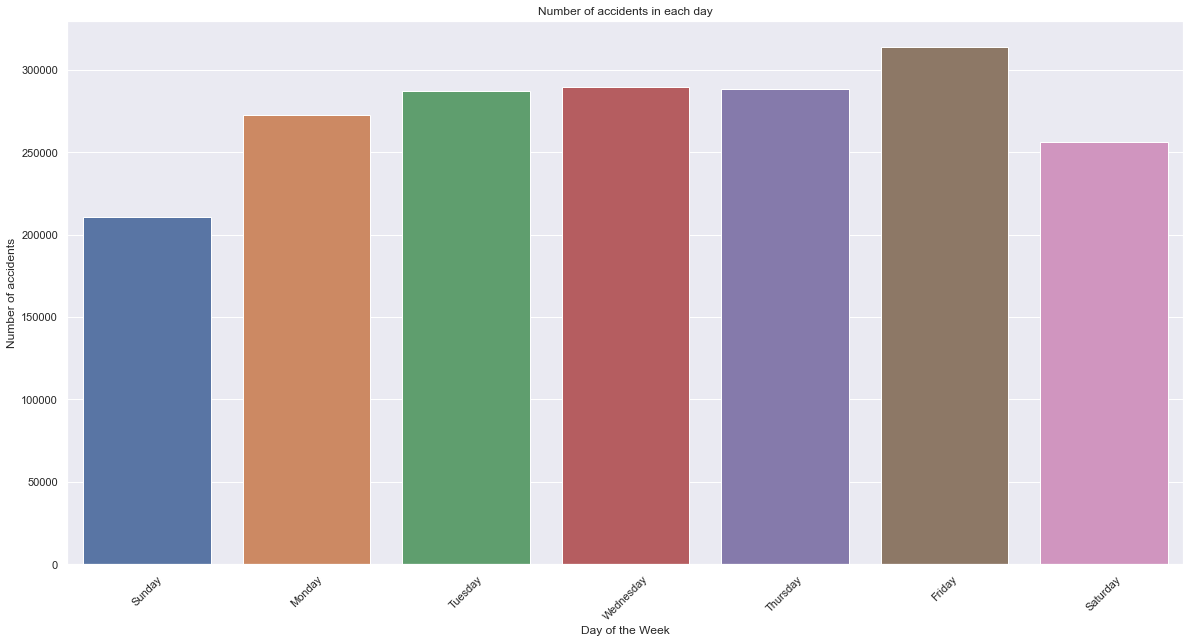

In [144]:
sns.countplot(data=accidents, x="Day_of_Week", order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.xticks(rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each day")
plt.show()